# Progetto di Analisi dei Dati: Evoluzione dell'alimentazione e gli impatti sulla salute e la produzione agricola in Italia

## Autore
Natan Sacilotto – 192131

## Obiettivo del progetto
Analizzare come le abitudini alimentari siano cambiate nel corso dei decenni e come queste abbiano influenzato:
- La diffusione di alcune malattie legate all’alimentazione
- Il mercato agroalimentare e zootecnico
- I prezzi dei principali alimenti in Italia

## Domande guida
1. Come sono cambiate le abitudini alimentari (grassi, zuccheri, proteine, verdure)?
2. Come questi cambiamenti si collegano all'andamento dell'indice di obesità e sovreppeso?
3. Quali sono gli effetti dell'uso del suolo?
4. Com'è l'andamento delle emissioni di C02 causate dalla filiera alimentare?

---

## Dataset utilizzati

| Nome dataset | Fonte | URL/Note |
|--------------|-------|----------|
| Consumo alimentare mondiale | OECD | https://www.oecd.org |
| Uso del suolo | FAOSTAT | https://www.fao.org/faostat |
| Dati sanitari (obesità) | OECD | https://www.oecd.org |
| Emissioni C02 | FAOSTAT | https://www.fao.org/faostat/ |

---

# Consumo Calorico e dei Macronutrienti (Italia, 1961–2022)

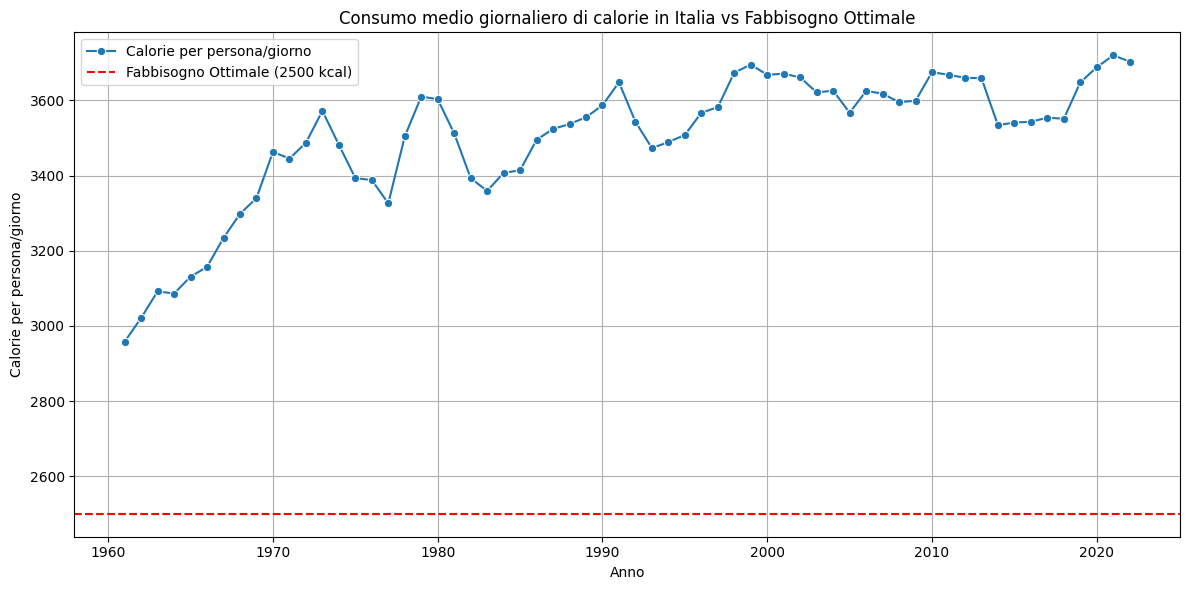

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_calorie = pd.read_csv("Datasets/calorie_per_persona.csv")  # carico il dataset

# Pulizia delle colonne
df_calorie = df_calorie[['TIME_PERIOD', 'OBS_VALUE']].copy()  #crea una copia con solo le colonne utili
df_calorie.dropna(inplace=True)  #rimuove righe con valori nulli

# Ordinamento per data
df_calorie.sort_values('TIME_PERIOD', inplace=True)

# Rinomino le colonne per chiarezza
df_calorie.rename(columns={'TIME_PERIOD': 'Anno', 'OBS_VALUE': 'Calorie'}, inplace=True)

# Aggiungo colonna con lo scostamento percentuale rispetto al fabbisogno medio
fabbisogno_ottimale = 2500
df_calorie['Scostamento_%'] = ((df_calorie['Calorie'] - fabbisogno_ottimale) / fabbisogno_ottimale) * 100

# Grafico
plt.figure(figsize=(12, 6))

# Linea delle calorie osservate
sns.lineplot(data=df_calorie, x='Anno', y='Calorie', label='Calorie per persona/giorno', marker='o')

# Linea del fabbisogno ottimale
plt.axhline(y=fabbisogno_ottimale, color='red', linestyle='--', label='Fabbisogno Ottimale (2500 kcal)')

plt.title('Consumo medio giornaliero di calorie in Italia vs Fabbisogno Ottimale')
plt.xlabel('Anno')
plt.ylabel('Calorie per persona/giorno')
plt.legend()
plt.grid(True)
plt.tight_layout()  #serve a sistemare automaticamente la spaziatura tra elementi del grafico
plt.show()

# Analisi descrittiva

## Analisi del consumo calorico e dei macronutrienti (Italia, 1961–2022)

### Consumo calorico giornaliero pro capite

Il grafico mostra un **aumento significativo del consumo calorico medio per persona** in Italia tra il 1961 e gli anni '70:  
- Nel 1961 il consumo era sotto le **3000 kcal/giorno**.
- Negli anni '70 ha raggiunto la quota di **3600 kcal/giorno**, con un aumento di oltre 500 kcal.
- Da allora il valore è rimasto **stabilmente elevato**, rimanendo fisso intorno alle **3700 kcal** fino ai giorni nostri.

Negli anni '70 l’Italia ha attraversato un periodo di importanti **trasformazioni economiche e sociali**:
- **Boom economico post-bellico (fine anni '50 - inizio '70)**: aumento del reddito, urbanizzazione e diffusione della grande distribuzione.
- **Transizione nutrizionale**: passaggio da una dieta povera (prevalentemente vegetale) a una dieta più ricca di grassi, zuccheri e proteine animali.
- **Accesso più facile agli alimenti industriali** grazie alla modernizzazione agricola e alla crescita del settore alimentare.
---

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Caricamento e pulizia dati
datasets = {
    'Grassi': pd.read_csv("Datasets/grassi_per_persona_grammi.csv"),
    'Proteine': pd.read_csv("Datasets/proteine_per_persona_grammi.csv"),
    'Zuccheri': pd.read_csv("Datasets/zucchero_per_persona_grammi.csv"),
    'Verdure': pd.read_csv("Datasets/verdura_per_persona_grammi.csv")
}

for key, df in datasets.items():
    df = df[['TIME_PERIOD', 'OBS_VALUE']].dropna()
    df['TIME_PERIOD'] = df['TIME_PERIOD'].astype(int)
    df['OBS_VALUE'] = df['OBS_VALUE'].astype(float)
    df.sort_values('TIME_PERIOD', inplace=True)
    df.rename(columns={'TIME_PERIOD': 'Anno', 'OBS_VALUE': 'Grammi'}, inplace=True)
    datasets[key] = df

# Fabbisogni predefiniti in grammi
fabbisogni = {
    'Grassi': 83,
    'Proteine': 94,
    'Zuccheri': 50,
    'Verdure': 400
}

# Widget di selezione
nutriente_selector = widgets.Dropdown(
    options = list(datasets.keys()),
    value = 'Grassi',
    description = 'Nutriente:'
)



# Funzione aggiornata
def aggiorna_grafico(nutriente):
    clear_output(wait=True)

    df = datasets[nutriente].copy()
    fabbisogno = fabbisogni[nutriente]

    df['Scostamento_%'] = ((df['Grammi'] - fabbisogno) / fabbisogno) * 100

    # Grafico
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Anno', y='Grammi', label=f'{nutriente} consumati', marker='o')
    plt.axhline(y=fabbisogno, color='red', linestyle='--', label=f'Fabbisogno ({fabbisogno}g/giorno)')
    plt.title(f'Consumo di {nutriente.lower()} vs Fabbisogno Giornaliero (dieta da 2500 kcal)')
    plt.xlabel('Anno')
    plt.ylabel('Grammi al giorno')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Collegamento dei widget
widgets.interact(aggiorna_grafico, nutriente=nutriente_selector)

interactive(children=(Dropdown(description='Nutriente:', options=('Grassi', 'Proteine', 'Zuccheri', 'Verdure')…

<function __main__.aggiorna_grafico(nutriente)>

### Consumo giornaliero di macronutrienti (in grammi)

Nel secondo grafico sono rappresentati i trend di consumo pro capite di:
- **Zucchero**
- **Grassi**
- **Proteine**
- **Verdure**

#### Osservazioni:

- **Zucchero**: da circa **25 g/giorno** negli anni ’60 a **35 g/giorno** dagli anni ’70 in poi. Un aumento costante, coerente con l’espansione dell’industria alimentare e l’incremento dei prodotti confezionati.
- **Grassi**: da circa **75 g/giorno** a oltre **150–160 g/giorno** oggi. Raddoppio netto, compatibile con l’aumento del consumo di carne, formaggi e alimenti trasformati.
- **Proteine**: passano da **75 g/giorno** a oltre **110 g/giorno**, con una maggiore presenza di carne e latticini nella dieta.
- **Verdura**: in crescita fino al 2000, ma **seguita da un calo netto attorno al 2020**, influenzato:
  - dalle modifiche nelle abitudini durante la pandemia del COVID-19
  - dal calo di consumo di prodotti freschi e dall’aumento dei piatti pronti

---

### Interpretazioni e ipotesi

- L’aumento di **calorie, zuccheri e grassi** coincide con il passaggio da un'alimentazione di sussistenza a una **dieta abbondante ma sbilanciata**, tipica delle società industrializzate.
- Il **calo del consumo di verdure** potrebbe derivare anche da:
  - una maggiore diffusione del consumo di **junk food** e alimenti raffinati
  - una minore propensione alla preparazione di cibi freschi
- L’aumento delle **proteine** può essere collegato:
  - allo sviluppo della zootecnia intensiva
  - al cambiamento culturale che ha reso carne e derivati una presenza quotidiana a tavola

---

Queste tendenze possono essere collegate a:
- l’aumento dell’**obesità e del diabete** negli ultimi decenni
- cambiamenti nella **produzione agricola e zootecnica**
- dinamiche dei **prezzi alimentari** che rendono più accessibili calorie a basso costo rispetto ad alimenti freschi e nutrienti

Nei prossimi step esploreremo queste correlazioni attraverso modelli statistici e confronti tra variabili.

---

# Andamento della popolazione obesa e sovrappeso in Italia (1993-2023)

Nel grafico qui sotto è rappresentato l'andamento percentuale della popolazione italiana classificata come **obesa** e **sovrappeso**.

In [4]:
df_obesity = pd.read_csv("Datasets/OECDO_bese_overweight_MF.csv")  # carico il dataset

# Per fare pulizia estraggo solo le colonne utili
df_clean = df_obesity[['MEASURE', 'SEX', 'TIME_PERIOD', 'OBS_VALUE']].copy()  #.copy() crea una copia indipendente, sicura da modificare
df_clean.dropna(inplace=True)

# Ho creato un dizionario per tradurre i codici grezzi in etichette leggibili
label_misura = {
    'SP_OBS': 'Obesità',
    'SP_OVRGHT': 'Sovrappeso'
}
label_sesso = {
    'F': 'Femminile',
    'M': 'Maschile',
    '_T': 'Totale'
}

# Widget per la scelta
tipo_selector = widgets.Dropdown(
    options=[('Obesità', 'SP_OBS'), ('Sovrappeso', 'SP_OVRGHT')],  #utilizza 2 tuple, l’utente vede solo "Obesità" e "Sovrappeso" ma quando seleziona, il widget restituisce il valore associato: "SP_OBS" o "SP_OVRGHT"
    value='SP_OBS',
    description='Categoria:'
)

# Funzione interattiva
def aggiorna_grafico(tipo_misura):
    clear_output(wait=True)  # cancella il grafico vecchio

    df = df_obesity[df_obesity['MEASURE'] == tipo_misura]  #maschera booleana

    plt.figure(figsize=(12, 6))
    for sesso in ['F', 'M', '_T']:
        sotto = df[df['SEX'] == sesso]
        sns.lineplot(data=sotto, x='TIME_PERIOD', y='OBS_VALUE', label=label_sesso[sesso], marker='o')

    plt.title(f"Andamento percentuale persone con {label_misura[tipo_misura]} in Italia")
    plt.xlabel("Anno")
    plt.ylabel("Percentuale della popolazione (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Attiva la GUI
widgets.interact(aggiorna_grafico, tipo_misura=tipo_selector)


interactive(children=(Dropdown(description='Categoria:', options=(('Obesità', 'SP_OBS'), ('Sovrappeso', 'SP_OV…

<function __main__.aggiorna_grafico(tipo_misura)>

# Analisi dell’andamento dell’obesità in Italia

L’andamento percentuale delle persone obese in Italia dal 1993 al 2023 mostra un incremento costante in tutte le categorie di genere:

- **Maschi**: si osserva una crescita più marcata. Si passa dal 7,3% circa nel 1993 a quasi il 13% nel 2023. La linea di tendenza è regolare, con piccoli cali, ma con un trend di crescita costante.
- **Femmine**: il trend è in aumento, anche se meno ripido. Si parte da un 6,7% circa nel 1993 fino a superare l'11% nel 2023.
- **Totale**: la linea dei valori totali (fornita dal dataset) segue un andamento intermedio tra quello dei maschi e quello delle femmine, con un trend generalmente regolare e crescente. Tuttavia, sembra riflettere una media semplice piuttosto che una media ponderata.

## Osservazioni chiave

- L’aumento è continuo e significativo in tutte le fasce di popolazione.
- Non si notano veri periodi di regressione stabile: anche negli anni in cui si è registrato un lieve calo, il trend di lungo periodo è rimasto in crescita.
- Nel tempo, il divario tra maschi e femmine si è ampliato, con i maschi che risultano nettamente più colpiti dall'obesità.

## Possibili cause (da approfondire)

- Cambiamenti nelle abitudini alimentari (aumento del consumo di zuccheri, grassi e cibi processati, come evidenziato anche dai grafici precedenti);
- Riduzione dell’attività fisica nella vita quotidiana;
- Invecchiamento della popolazione, che incide sui livelli medi di obesità;
- Fattori socio-economici (es. urbanizzazione, lavoro sedentario, ecc.).

## Conclusione

I dati evidenziano un problema di salute pubblica in crescita.  
L’obesità in Italia è aumentata costantemente negli ultimi 30 anni, richiedendo interventi educativi, nutrizionali e politici per poter contrastare il fenomeno.

---

# Evoluzione dell'uso del suolo (Italia, 1961–2023)

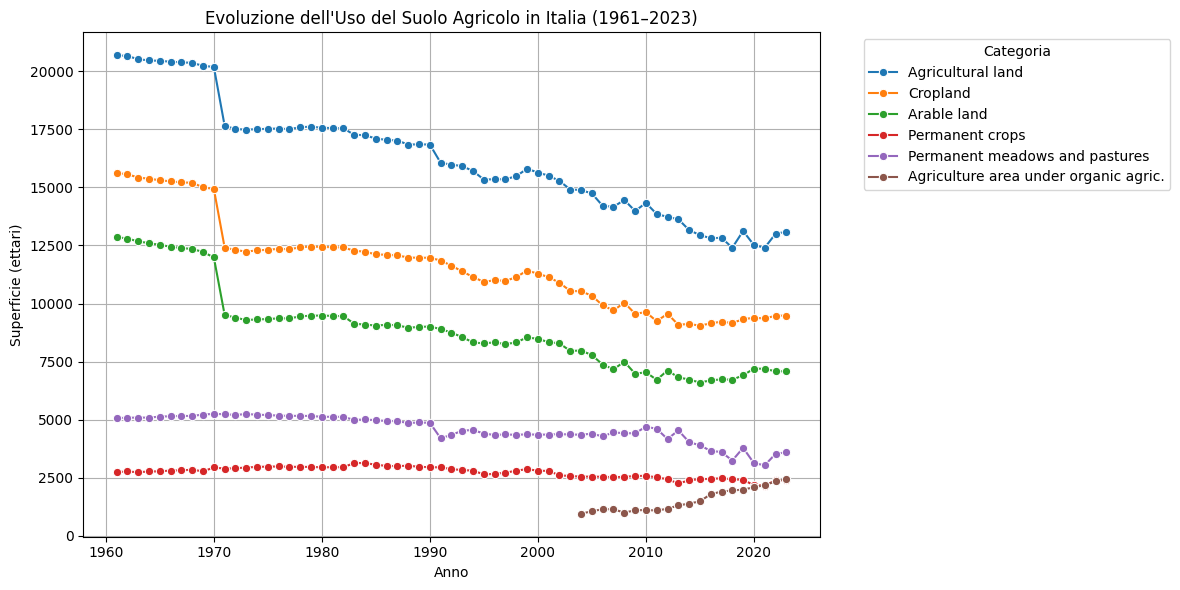

In [11]:
df_land = pd.read_csv("Datasets/FAOSTAT_data_land_use.csv")

categorie_da_tenere = [
    'Agricultural land',
    'Cropland',
    'Arable land',
    'Permanent crops',
    'Permanent meadows and pastures',
    'Agriculture area under organic agric.'
]

#isin è molto utile perché controlla per ogni riga se il valore item è contenuto 
#nella lista categorie_da_tenere e restituisce una serie booleana true o false
df_land = df_land[df_land['Item'].isin(categorie_da_tenere)]  #in questa riga di codice, ho creato una maschera booleana utilizzando la funzione isin
df_land = df_land[['Year', 'Item', 'Value']].rename(columns={
    'Year': 'Anno',
    'Item': 'Categoria',
    'Value': 'Superficie_ha'
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_land, x='Anno', y='Superficie_ha', hue='Categoria', marker='o')

plt.title("Evoluzione dell'Uso del Suolo Agricolo in Italia (1961–2023)")
plt.xlabel("Anno")
plt.ylabel("Superficie (ettari)")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analisi dell'evoluzione dell'uso del suolo agricolo in Italia (1961–2023)

Il grafico mostra l’andamento storico delle principali categorie di uso del suolo agricolo in Italia, con dati forniti dalla FAO dal 1961 al 2023.

### Tendenze generali

Nel corso degli ultimi 60 anni si osserva una **riduzione significativa delle superfici agricole complessive**, con un calo marcato sia delle terre coltivate (cropland e arable land), sia delle superfici dedicate ai pascoli e alle colture. Questo ha condotto ad un **progressivo abbandono delle pratiche agricole tradizionali**, dovuto a fattori economici, sociali e politici, come:
- urbanizzazione crescente e consumo di suolo,
- meccanizzazione e concentrazione delle aziende agricole,
- cambiamenti nelle politiche agricole europee,
- trasformazioni nei consumi e nelle filiere alimentari.

### Segnali positivi

A partire dagli anni 2000, si nota una **crescita costante dell’agricoltura biologica**, che rappresenta una delle poche componenti in espansione. Questo indica un **rinnovato interesse verso modelli produttivi più sostenibili** e attenti all’ambiente.

---

# Evoluzione delle emimissioni di CO2 (1990–2023)

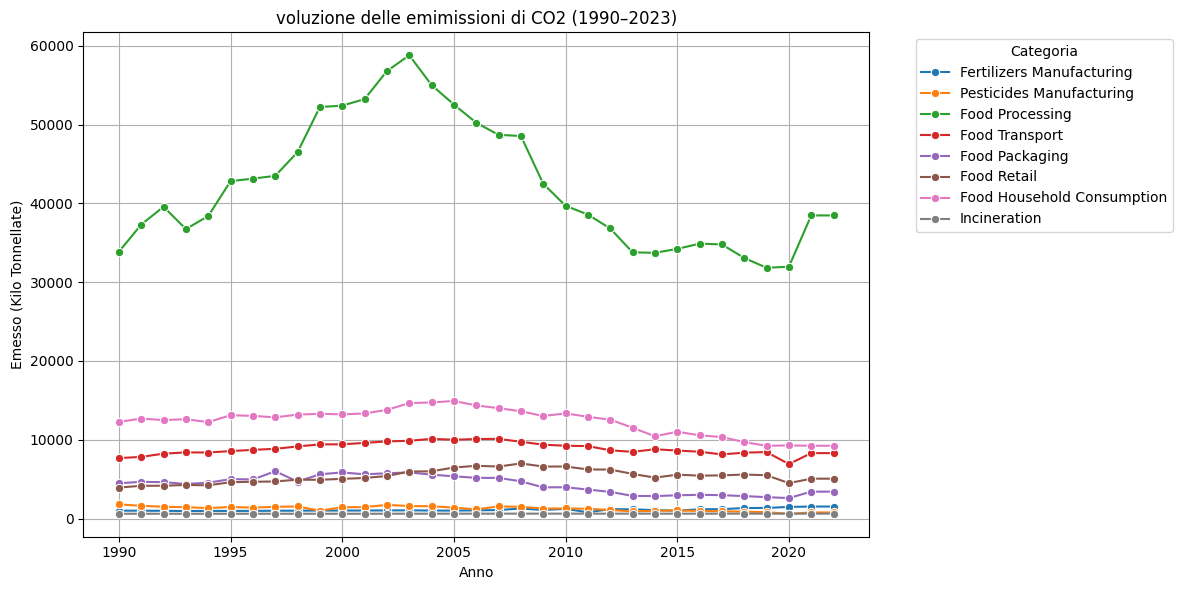

In [32]:
df_emissioni = pd.read_csv("Datasets/FAOSTAT_data_emissioni_CO2.csv")  # carico il dataset

categorie_da_tenere = [
    'Fertilizers Manufacturing',
    'Food Processing',
    'Food Transport',
    'Food Packaging',
    'Food Retail',
    'Food Household Consumption'
]

df_emissioni = df_emissioni[['Year', 'Item', 'Value']].rename(columns={
    'Year': 'Anno',
    'Item': 'Categoria',
    'Value': 'Emesso'
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_emissioni, x='Anno', y='Emesso', hue='Categoria', marker='o')

plt.title("voluzione delle emimissioni di CO2 (1990–2023)")
plt.xlabel("Anno")
plt.ylabel("Emesso (Kilo Tonnellate)")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analisi dell'evoluzione delle emissioni di CO₂ nella filiera alimentare in Italia (1990–2023)

Il grafico mostra le emissioni di CO₂ (in kiloton) generate dalle diverse fasi del sistema agroalimentare in Italia. Ogni linea rappresenta una fase specifica della filiera, dal settore industriale (es. fertilizzanti, pesticidi) fino al consumo domestico.

### Osservazioni principali

- Il **Food Processing** è nettamente la **maggior fonte di emissioni** durante tutto il periodo analizzato. Dopo una crescita costante dagli anni '90 fino al picco del 2004 (~59.000 kt), si osserva una **decisa decrescita** fino al 2020, con una leggera ripresa nel 2022-2023.

- La **Food Household Consumption** è la **seconda voce più rilevante**, con un andamento simile: stabile fino al 2005, poi un calo significativo, probabilmente legato a miglioramenti nell’efficienza energetica domestica o cambiamenti nelle abitudini di consumo.

- Il **Food Transport** e Il **Food Retail** mostrano un leggero incremento fino ai primi anni 2000, seguito da un lento declino. Questo può riflettere miglioramenti nella logistica o una maggiore localizzazione della filiera.

- Le categorie **Fertilizers Manufacturing**, **Pesticides Manufacturing**, **Food Packaging**, e **Incineration** mostrano **valori più contenuti**, con variazioni relativamente stabili o in lieve calo nel tempo. La loro stabilità può essere attribuita a un uso più efficiente delle risorse o a normative ambientali più severe.

### Tendenze generali

- Dal 2005 in poi si nota una **tendenza al calo delle emissioni** in quasi tutte le categorie, coerente con le politiche ambientali europee (come il Protocollo di Kyoto e l’Agenda 2030) e l’introduzione di tecnologie più sostenibili.

- Il **rimbalzo del 2022–2023** in alcune categorie potrebbe essere collegato alla ripresa post-pandemia o ad effetti secondari delle crisi energetiche globali.

### Conclusione

Il sistema alimentare italiano ha ridotto significativamente le sue emissioni di CO₂ dal 2005, in particolare nel settore della trasformazione alimentare e nei consumi domestici. Tuttavia, restano **criticità ambientali** nelle fasi logistiche e industriali che richiedono ulteriore innovazione e sostenibilità.

---

# Conclusioni Finali

Questo studio sull'evoluzione delle abitudini alimentari e dei relativi impatti economici, ambientali e sanitari in Italia dal 1961 ad oggi ha portato alle seguenti considerazioni chiave:

### Cambiamenti alimentari significativi
- Le calorie consumate giornalmente per persona sono aumentate da ~2500 kcal negli anni '60 a oltre 3600 kcal oggi.
- I consumi di **grassi** e **proteine** sono raddoppiati, mentre quelli degli **zuccheri** sono cresciuti in modo costante.
- Il consumo di **verdure** è aumentato fino agli anni 2000, ma ha subito un calo negli ultimi anni.

### Impatti sulla salute
- L’aumento di calorie e macronutrienti si collega a un incremento delle percentuali di **obesità e sovrappeso**, soprattutto nella popolazione maschile.
- Nonostante questo, l'**aspettativa di vita è aumentata** grazie ai progressi medici, ma i trend attuali avvisano **rischi futuri** in termini di salute pubblica.

### Evoluzione del settore agricolo
- L’**uso del suolo agricolo** è calato drasticamente, specialmente nella componente arabile e permanente, mentre cresce la quota di agricoltura biologica.
- Il **mercato alimentare** ha inciso anche sull’ambiente, con un iniziale aumento delle **emissioni di CO₂** (soprattutto nel food processing) seguito da un calo negli ultimi decenni.

### Considerazioni finali
- L’Italia ha attraversato una **transizione alimentare**: da una dieta mediterranea tradizionale a un modello più calorico e industrializzato.
- Serve promuovere nuovamente abitudini alimentari equilibrate, sostenibili e coerenti con il fabbisogno nutrizionale, per affrontare le sfide **sanitarie, ambientali e sociali** del futuro.

> Il miglioramento dell'alimentazione non è solo una questione individuale, ma un tema di salute pubblica, ambiente e sostenibilità economica.